# Exercise 5 : Classification Tree

### Problem 1 : Predicting CentralAir using SalePrice

In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.    
a) Create appropriate datasets for Train and Test in an 75:25 ratio and fit two Classification Tree models (of max
depth 3 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

In [52]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [53]:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
print("Data type : ", type(house))
print("Data dims : ", house.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [55]:
##Basic data exploration, centralair and saleprice dataframe datatype
centralair = pd.DataFrame(house['CentralAir']) #respondor
saleprice = pd.DataFrame(house['SalePrice']) #predictor 
centralair.describe()

,CentralAir
count,1460
unique,2
top,Y
freq,1365


In [56]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [57]:
centralair['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [58]:
##randomize the 1460 datasets into 75:25 ratio to train-test respectively
sp_train, sp_test, ca_train, ca_test = train_test_split(saleprice, centralair, test_size = 0.25)

In [59]:
sp_train.shape #1460 * 75% = 1095

(1095, 1)

In [60]:
sp_train.describe()

,SalePrice
count,1095.000000
mean,182997.431050
std,82577.365222
min,34900.000000
25%,130750.000000
50%,163500.000000
75%,215000.000000
max,755000.000000


In [61]:
ca_train.shape

(1095, 1)

In [62]:
ca_train.describe()

,CentralAir
count,1095
unique,2
top,Y
freq,1017


In [63]:
sp_test.shape #1460 * 25% = 365

(365, 1)

In [64]:
ca_test.shape

(365, 1)

/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


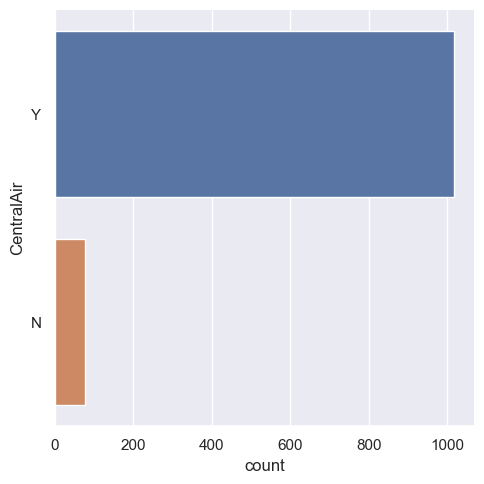

In [65]:
#explore data of respondor
sb.catplot(y = "CentralAir", data = ca_train, kind = "count")

<Axes: >

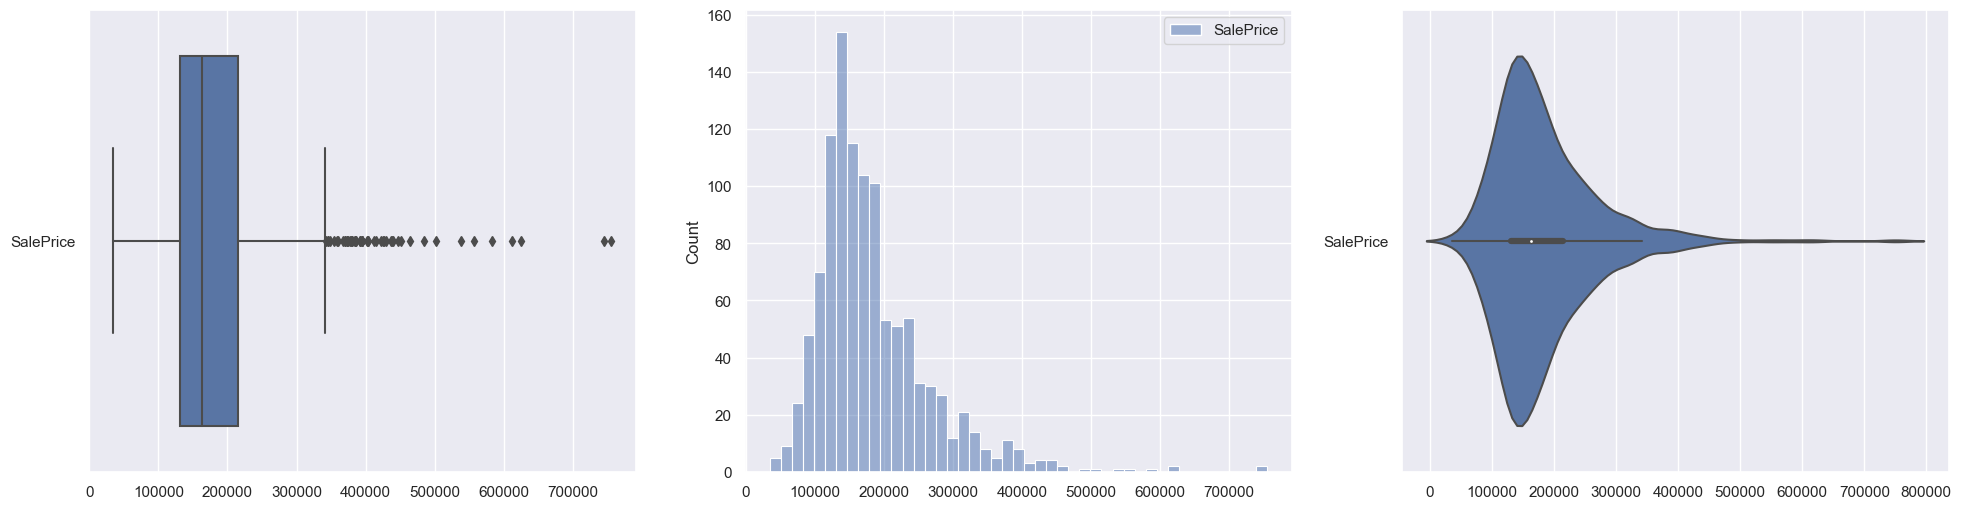

In [66]:
#explore data of predictor
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = sp_train, orient = "h", ax = axes[0])
sb.histplot(data = sp_train, ax = axes[1])
sb.violinplot(data = sp_train, orient = "h", ax = axes[2])

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


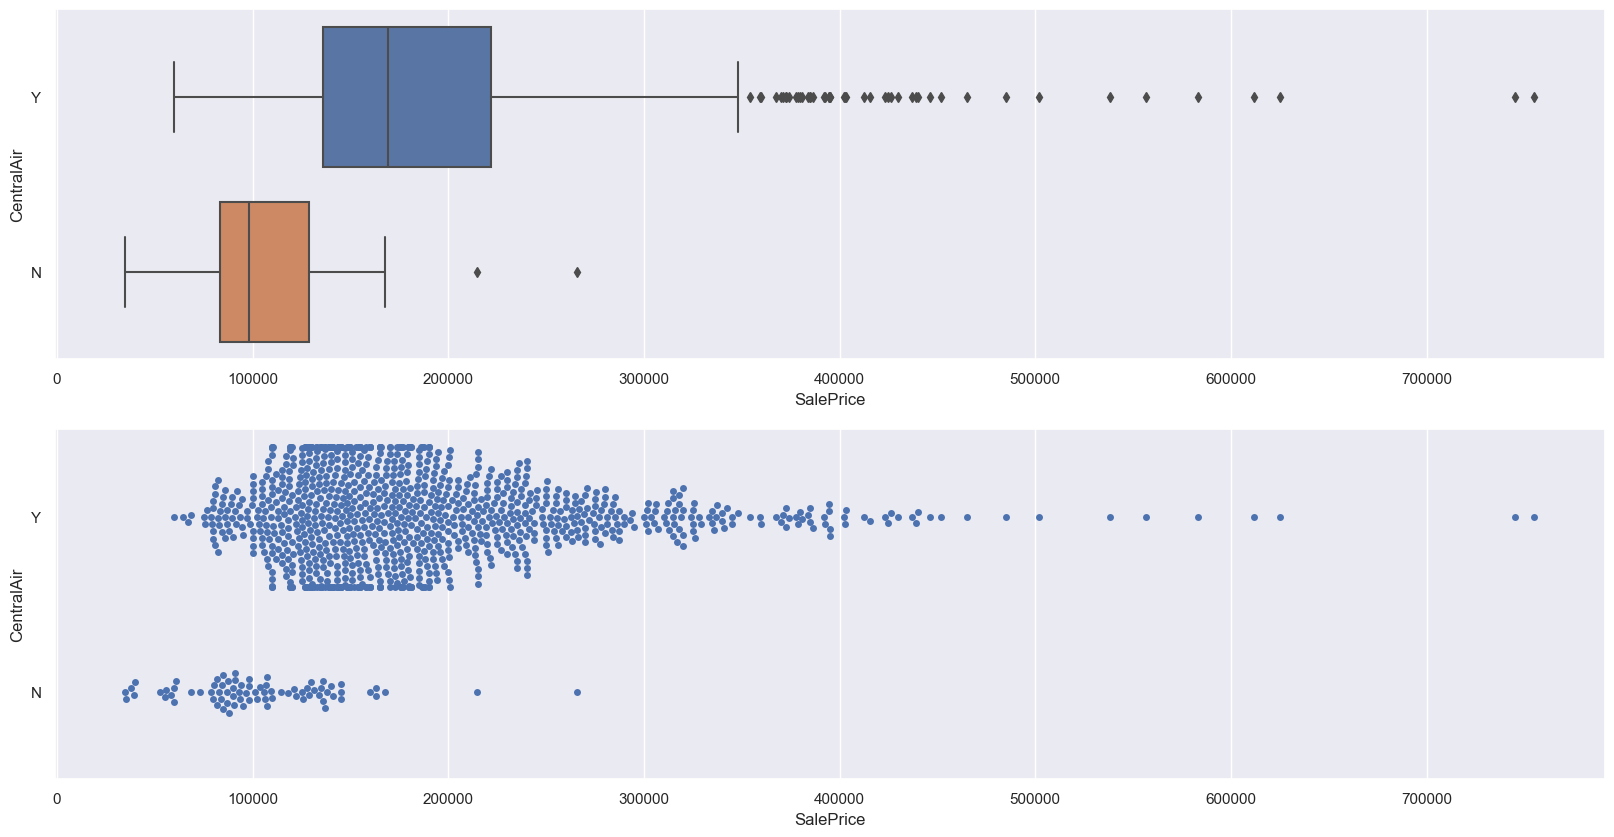

In [67]:
df = pd.concat([sp_train, ca_train], axis = 1).reindex(sp_train.index)

#swarmplot
f, axes = plt.subplots(2, 1, figsize=(20, 10))
sb.boxplot(x = 'SalePrice', y = 'CentralAir', data = df, orient = "h", ax = axes[0])
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = df, orient = "h", ax = axes[1])

Through visual analysis of the boxplot and swarmplot, it tells us that the first partition falls around 100000, whereby higher probability of CentralAir(CA) if the saleprice is >100000.   
At SalePrice of >300000, it is almost certain that there will be CA.
Hence for both the decision tree, the parameter of class_names will take in "no CA" on the left and "CA" on the right, for less than and more than respectively.

### TREE OF MAX_DEPTH 3

In [68]:
# decision tree classifier object
dectree3 = DecisionTreeClassifier(max_depth = 3)

In [69]:
dectree3.fit(sp_train, ca_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'SalePrice <= 98300.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = CA'),
 Text(0.25, 0.625, 'SalePrice <= 62750.0\ngini = 0.499\nsamples = 85\nvalue = [41, 44]\nclass = CA'),
 Text(0.125, 0.375, 'SalePrice <= 59250.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = no CA'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = no CA'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = no CA'),
 Text(0.375, 0.375, 'SalePrice <= 97500.0\ngini = 0.481\nsamples = 72\nvalue = [29, 43]\nclass = CA'),
 Text(0.3125, 0.125, 'gini = 0.47\nsamples = 69\nvalue = [26, 43]\nclass = CA'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no CA'),
 Text(0.75, 0.625, 'SalePrice <= 145125.0\ngini = 0.071\nsamples = 1010\nvalue = [37, 973]\nclass = CA'),
 Text(0.625, 0.375, 'SalePrice <= 107750.0\ngini = 0.167\nsamples = 336\nvalue = [31, 305]\nclass = CA'),
 Text(0.5625, 0.125, 'gini = 0.353\nsamples = 35\n

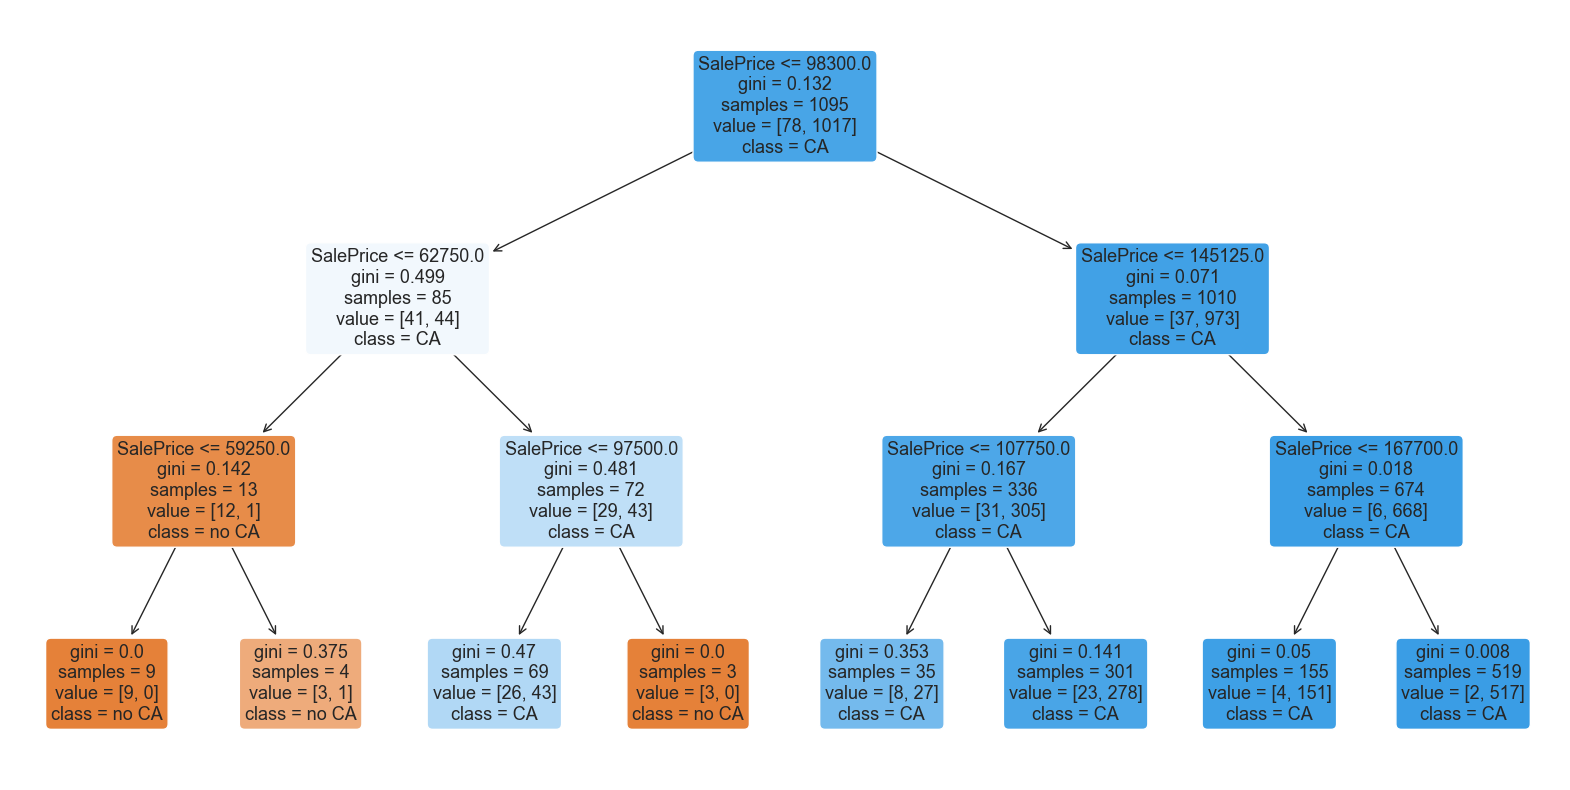

In [70]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,10))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["no CA","CA"])

### TREE OF MAX DEPTH 4

In [71]:
# decision tree classifier object
dectree4 = DecisionTreeClassifier(max_depth = 4)

In [72]:
dectree4.fit(sp_train, ca_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.44, 0.9, 'SalePrice <= 98300.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = CA'),
 Text(0.2, 0.7, 'SalePrice <= 62750.0\ngini = 0.499\nsamples = 85\nvalue = [41, 44]\nclass = CA'),
 Text(0.08, 0.5, 'SalePrice <= 59250.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = no CA'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = no CA'),
 Text(0.12, 0.3, 'SalePrice <= 60500.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = no CA'),
 Text(0.08, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = no CA'),
 Text(0.16, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no CA'),
 Text(0.32, 0.5, 'SalePrice <= 97500.0\ngini = 0.481\nsamples = 72\nvalue = [29, 43]\nclass = CA'),
 Text(0.28, 0.3, 'SalePrice <= 81500.0\ngini = 0.47\nsamples = 69\nvalue = [26, 43]\nclass = CA'),
 Text(0.24, 0.1, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = CA'),
 Text(0.32, 0.1, 'gini = 0.49\nsamples = 49\nvalue = [21, 28]\nclass = CA'),
 Text(0.36, 

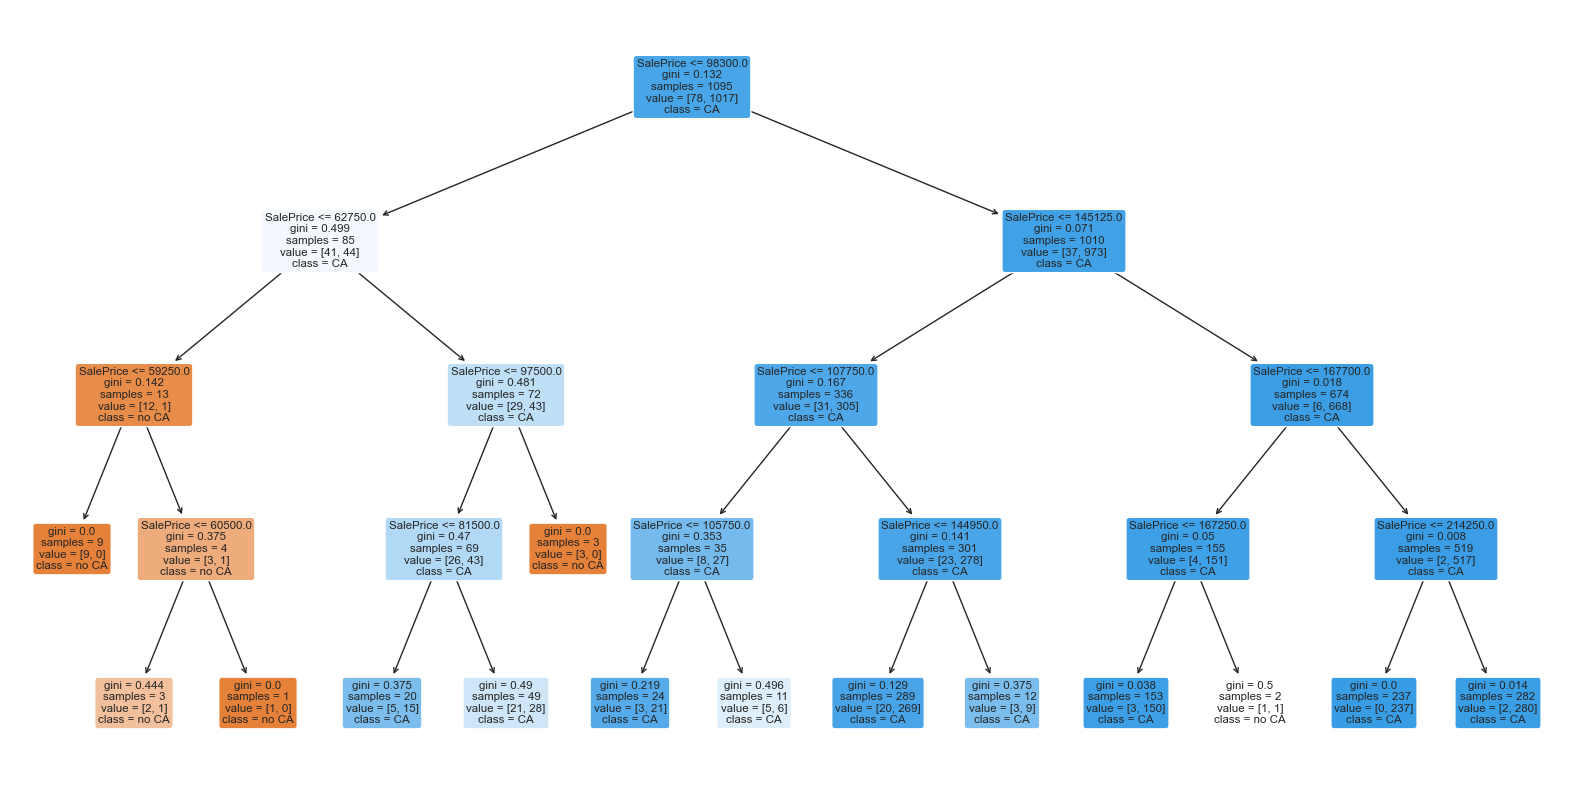

In [73]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,10))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["no CA","CA"])

b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both
the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

Goodness of Fit of the Model   
Check how good the predictions are on the TRAIN and TEST set.   
Metrics : **Classification Accuracy and Confusion Matrix**.

### METRICS FOR BINARY TREE OF DEPTH LEVEL 3

For binary tree of depth level = 3,


Classification Accuracy of TRAIN SET				: 0.9415525114155251
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.9990167158308751
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.8076923076923077


Classification Accuracy of TEST SET				: 0.947945205479452
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9913793103448276
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9411764705882353


Confusion Matrix of TRAIN SET:		 Confusion Matrix of TEST SET:		


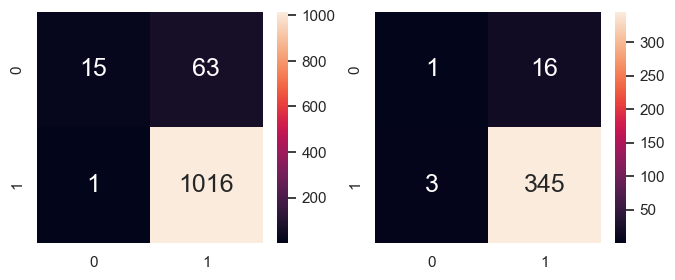

In [74]:
#predict CA corresponding to sp_train, sp_test
ca_train_pred3 = dectree3.predict(sp_train)
ca_test_pred3 = dectree3.predict(sp_test)

#plot the two-way Confusion Matrix
f,ax = plt.subplots(1,2,figsize=(8,3))
cnf_trainmatrix_3 = confusion_matrix(ca_train, ca_train_pred3)
cnf_testmatrix_3 = confusion_matrix(ca_test, ca_test_pred3)
sb.heatmap(cnf_trainmatrix_3, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(cnf_testmatrix_3, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[1])

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 3
FPtrain3 = cnf_trainmatrix_3.sum(axis=0) - np.diag(cnf_trainmatrix_3)  
FNtrain3 = cnf_trainmatrix_3.sum(axis=1) - np.diag(cnf_trainmatrix_3)
TPtrain3 = np.diag(cnf_trainmatrix_3)
TNtrain3 = cnf_trainmatrix_3.sum() - (FPtrain3 + FNtrain3 + TPtrain3)

FPtrain3 = FPtrain3.astype(float)
FNtrain3 = FNtrain3.astype(float)
TPtrain3 = TPtrain3.astype(float)
TNtrain3 = TNtrain3.astype(float)

#TPR
TPRtrain3 = TPtrain3/(TPtrain3+FNtrain3)
#FPR
FPRtrain3 = FPtrain3/(FPtrain3+TNtrain3)

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 4
FPtest3 = cnf_testmatrix_3.sum(axis=0) - np.diag(cnf_testmatrix_3)  
FNtest3 = cnf_testmatrix_3.sum(axis=1) - np.diag(cnf_testmatrix_3)
TPtest3 = np.diag(cnf_testmatrix_3)
TNtest3 = cnf_testmatrix_3.sum() - (FPtest3 + FNtest3 + TPtest3)

FPtest3 = FPtest3.astype(float)
FNtest3 = FNtest3.astype(float)
TPtest3 = TPtest3.astype(float)
TNtest3 = TNtest3.astype(float)

#TPR
TPRtest3 = TPtest3/(TPtest3+FNtest3)
#FPR
FPRtest3 = FPtest3/(FPtest3+TNtest3)

#print the Classification Accuracy
print("For binary tree of depth level = 3,")
print("\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree3.score(sp_train, ca_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:", (TPRtrain3[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:",(FPRtrain3[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree3.score(sp_test, ca_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:", (TPRtest3[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:",(FPRtest3[1]))
print("\n")
print("Confusion Matrix of TRAIN SET:\t\t Confusion Matrix of TEST SET:\t\t")

Goodness of Fit of the Model   
Check how good the predictions are on the TRAIN and TEST set.   
Metrics : **Classification Accuracy and Confusion Matrix**.

### METRICS FOR BINARY TREE OF DEPTH LEVEL 4

For binary tree of depth level = 4,


Classification Accuracy of TRAIN SET				: 0.9415525114155251
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is	: 0.9980334316617503
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is	: 0.7948717948717948


Classification Accuracy of TEST SET				: 0.9452054794520548
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is	: 0.9885057471264368
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is	: 0.9411764705882353


Confusion Matrix of TRAIN SET:		 Confusion Matrix of TEST SET:		


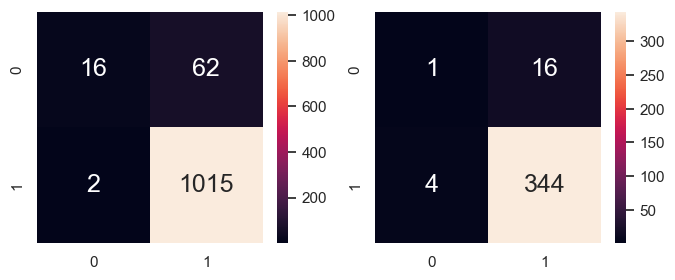

In [75]:
#predict CA corresponding to sp_train, sp_test
ca_train_pred4 = dectree4.predict(sp_train)
ca_test_pred4 = dectree4.predict(sp_test)

#plot the two-way Confusion Matrix
f,ax = plt.subplots(1,2,figsize=(8,3))
cnf_trainmatrix_4 = confusion_matrix(ca_train, ca_train_pred4)
cnf_testmatrix_4 = confusion_matrix(ca_test, ca_test_pred4)
sb.heatmap(cnf_trainmatrix_4, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(cnf_testmatrix_4, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[1])

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 3
FPtrain4 = cnf_trainmatrix_4.sum(axis=0) - np.diag(cnf_trainmatrix_4)  
FNtrain4 = cnf_trainmatrix_4.sum(axis=1) - np.diag(cnf_trainmatrix_4)
TPtrain4 = np.diag(cnf_trainmatrix_4)
TNtrain4 = cnf_trainmatrix_4.sum() - (FPtrain4 + FNtrain4 + TPtrain4)

FPtrain4 = FPtrain4.astype(float)
FNtrain4 = FNtrain4.astype(float)
TPtrain4 = TPtrain4.astype(float)
TNtrain4 = TNtrain4.astype(float)

#TPR
TPRtrain4 = TPtrain4/(TPtrain4+FNtrain4)
#FPR
FPRtrain4 = FPtrain4/(FPtrain4+TNtrain4)

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 4
FPtest4 = cnf_testmatrix_4.sum(axis=0) - np.diag(cnf_testmatrix_4)  
FNtest4 = cnf_testmatrix_4.sum(axis=1) - np.diag(cnf_testmatrix_4)
TPtest4 = np.diag(cnf_testmatrix_4)
TNtest4 = cnf_testmatrix_4.sum() - (FPtest4 + FNtest4 + TPtest4)

FPtest4 = FPtest4.astype(float)
FNtest4 = FNtest4.astype(float)
TPtest4 = TPtest4.astype(float)
TNtest4 = TNtest4.astype(float)

#TPR
TPRtest4 = TPtest4/(TPtest4+FNtest4)
#FPR
FPRtest4 = FPtest4/(FPtest4+TNtest4)

#print the Classification Accuracy
print("For binary tree of depth level = 4,")
print("\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree4.score(sp_train, ca_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is\t:", (TPRtrain4[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is\t:",(FPRtrain4[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree4.score(sp_test, ca_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is\t:", (TPRtest4[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is\t:",(FPRtest4[1]))
print("\n")
print("Confusion Matrix of TRAIN SET:\t\t Confusion Matrix of TEST SET:\t\t")

In [109]:
print("Summary of CA, TPR and FPR for conclusion\n")

print("For binary tree of depth level = 3,\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree3.score(sp_train, ca_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:", (TPRtrain3[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:",(FPRtrain3[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree3.score(sp_test, ca_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:", (TPRtest3[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:",(FPRtest3[1]))
print("\n")

#print the Classification Accuracy
print("For binary tree of depth level = 4,\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree4.score(sp_train, ca_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is\t:", (TPRtrain4[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is\t:",(FPRtrain4[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree4.score(sp_test, ca_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is\t:", (TPRtest4[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is\t:",(FPRtest4[1]))
print("\n")

Summary of CA, TPR and FPR for conclusion

For binary tree of depth level = 3,

Classification Accuracy of TRAIN SET				: 0.9415525114155251
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.9990167158308751
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.8076923076923077


Classification Accuracy of TEST SET				: 0.947945205479452
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9913793103448276
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9411764705882353


For binary tree of depth level = 4,

Classification Accuracy of TRAIN SET				: 0.9415525114155251
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is	: 0.9980334316617503
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 4 is	: 0.7948717948717948


Classification Accuracy of TEST SET				: 0.9452054794520548
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is	: 0.9885057471264368
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 4 is	: 0.94117

To look at which depth level is the better model to predict "CentralAir", we need to look at the Classification Accuracy (CA), True Positive Rate (TPR) and False Positive Rate (FPR).   

For depth level 3, the CA of the training set is the same as the CA of the training set of depth level 4. 
(0.941 = 0.941)   
However, for the test set, the CA of the depth level 3 is greater than the CA of the depth level 4 test set. (0.947 > 0.945)   
This means that the model of level 3 depth is a better model for predicting the presence of "CentralAir", as it will provide lesser margin error for prediction and hence a accurate and reliable model.
This is further supported with the fact that the TPR of test set of depth level 3 is greater than that of the TPR of test set of depth level 3. (0.991 > 0.988)     
The FPR for both depth is the same hence it does not help in comparing the two models.

# Problem 2 : Predicting CentralAir using Other Variables

Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 3) to
predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

### for OVERALLQUAL,

In [127]:
overallqual = pd.DataFrame(house['OverallQual'])
yearbuilt = pd.DataFrame(house['YearBuilt'])
overallqual.describe()

,OverallQual
count,1460.000000
mean,6.099315
std,1.382997
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


In [128]:
yearbuilt.describe()

,YearBuilt
count,1460.000000
mean,1971.267808
std,30.202904
min,1872.000000
25%,1954.000000
50%,1973.000000
75%,2000.000000
max,2010.000000


In [129]:
centralair['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [130]:
##randomize the 1460 datasets into 75:25 ratio to train-test respectively
oq_train, oq_test, ca1_train, ca1_test = train_test_split(overallqual, centralair, test_size = 0.25)
yb_train, yb_test, ca2_train, ca2_test = train_test_split(yearbuilt, centralair, test_size = 0.25)

In [131]:
#Train set should have 75% of 1460 = 1095 count of data point while test set should have 25% of 1460 = 365 count
print(f"For OverallQual, the train and test set has {oq_train.shape[0]} datapoint and {oq_test.shape[0]} datapoint respectively.")
print(f"For YearBuilt, the train and test set has {yb_train.shape[0]} datapoint and {yb_test.shape[0]} datapoint respectively.")

For OverallQual, the train and test set has 1095 datapoint and 365 datapoint respectively.
For YearBuilt, the train and test set has 1095 datapoint and 365 datapoint respectively.


/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


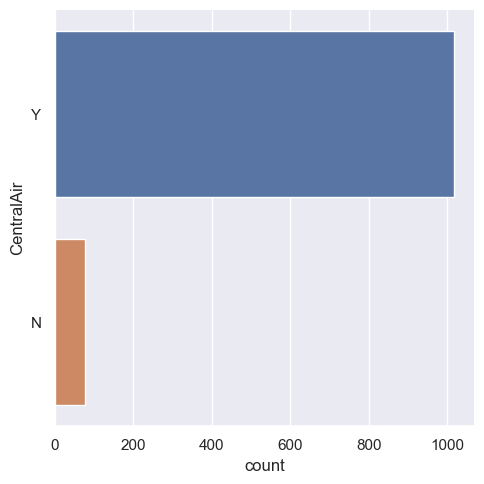

In [132]:
#explore data of response CentralAir, for both variable
sb.catplot(y = "CentralAir", data = ca_train, kind = "count")

<Axes: >

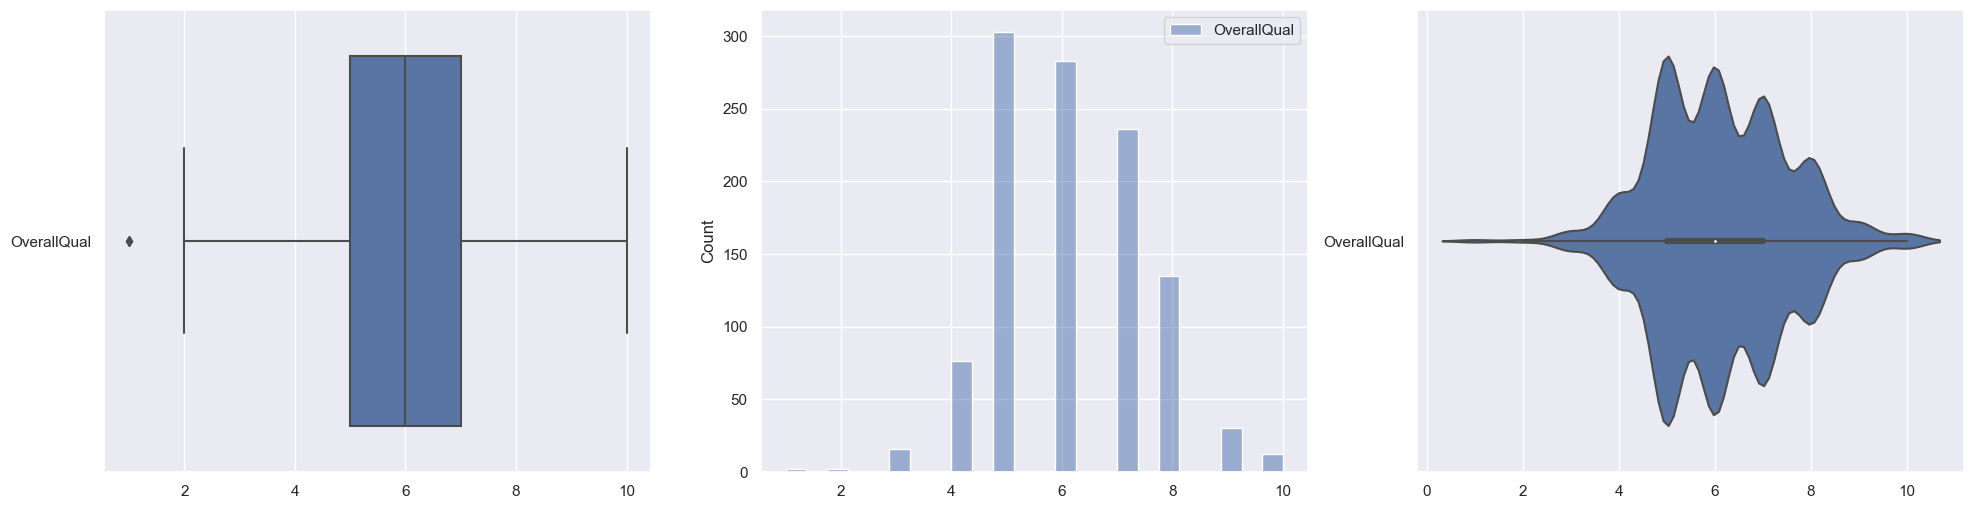

In [133]:
#explore data of predictor, oq_train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = oq_train, orient = "h", ax = axes[0])
sb.histplot(data = oq_train, ax = axes[1])
sb.violinplot(data = oq_train, orient = "h", ax = axes[2])

<Axes: >

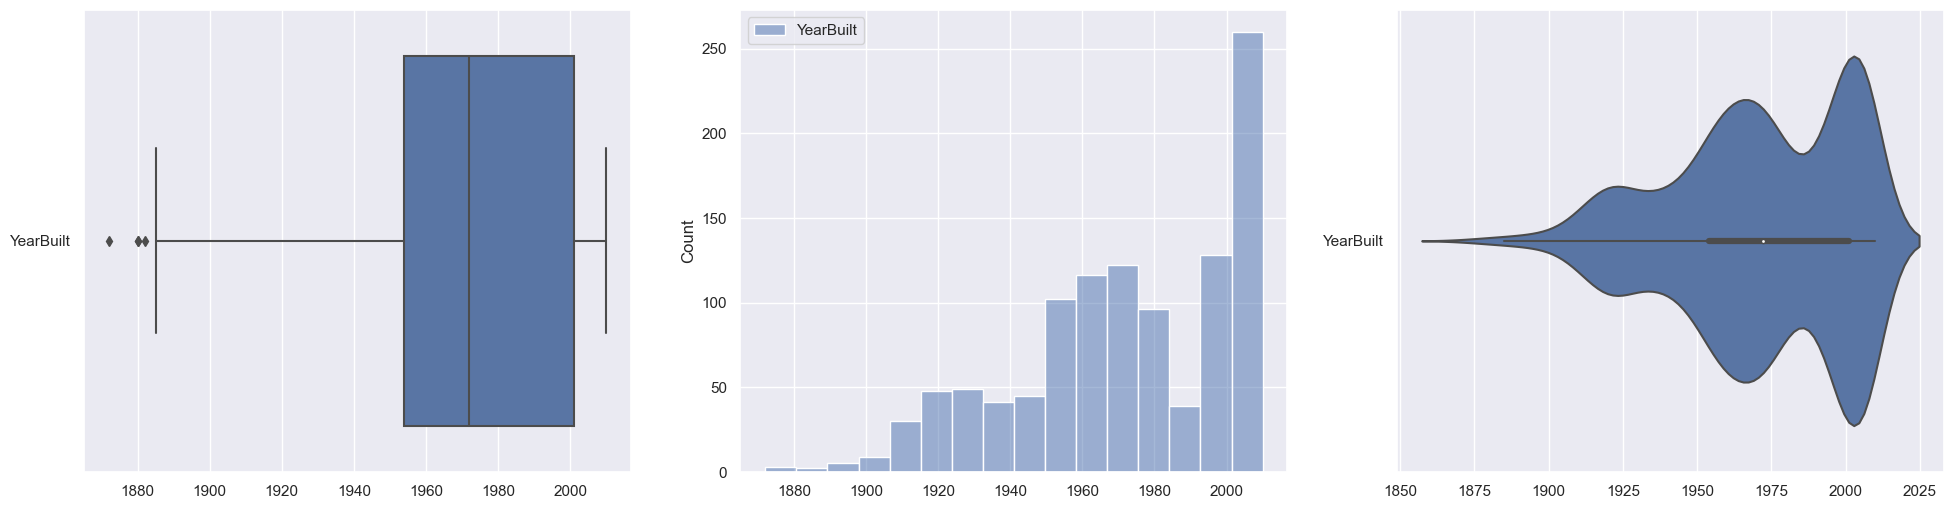

In [134]:
#explore data of predictor, oq_train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = yb_train, orient = "h", ax = axes[0])
sb.histplot(data = yb_train, ax = axes[1])
sb.violinplot(data = yb_train, orient = "h", ax = axes[2])

/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='YearBuilt', ylabel='CentralAir'>

/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


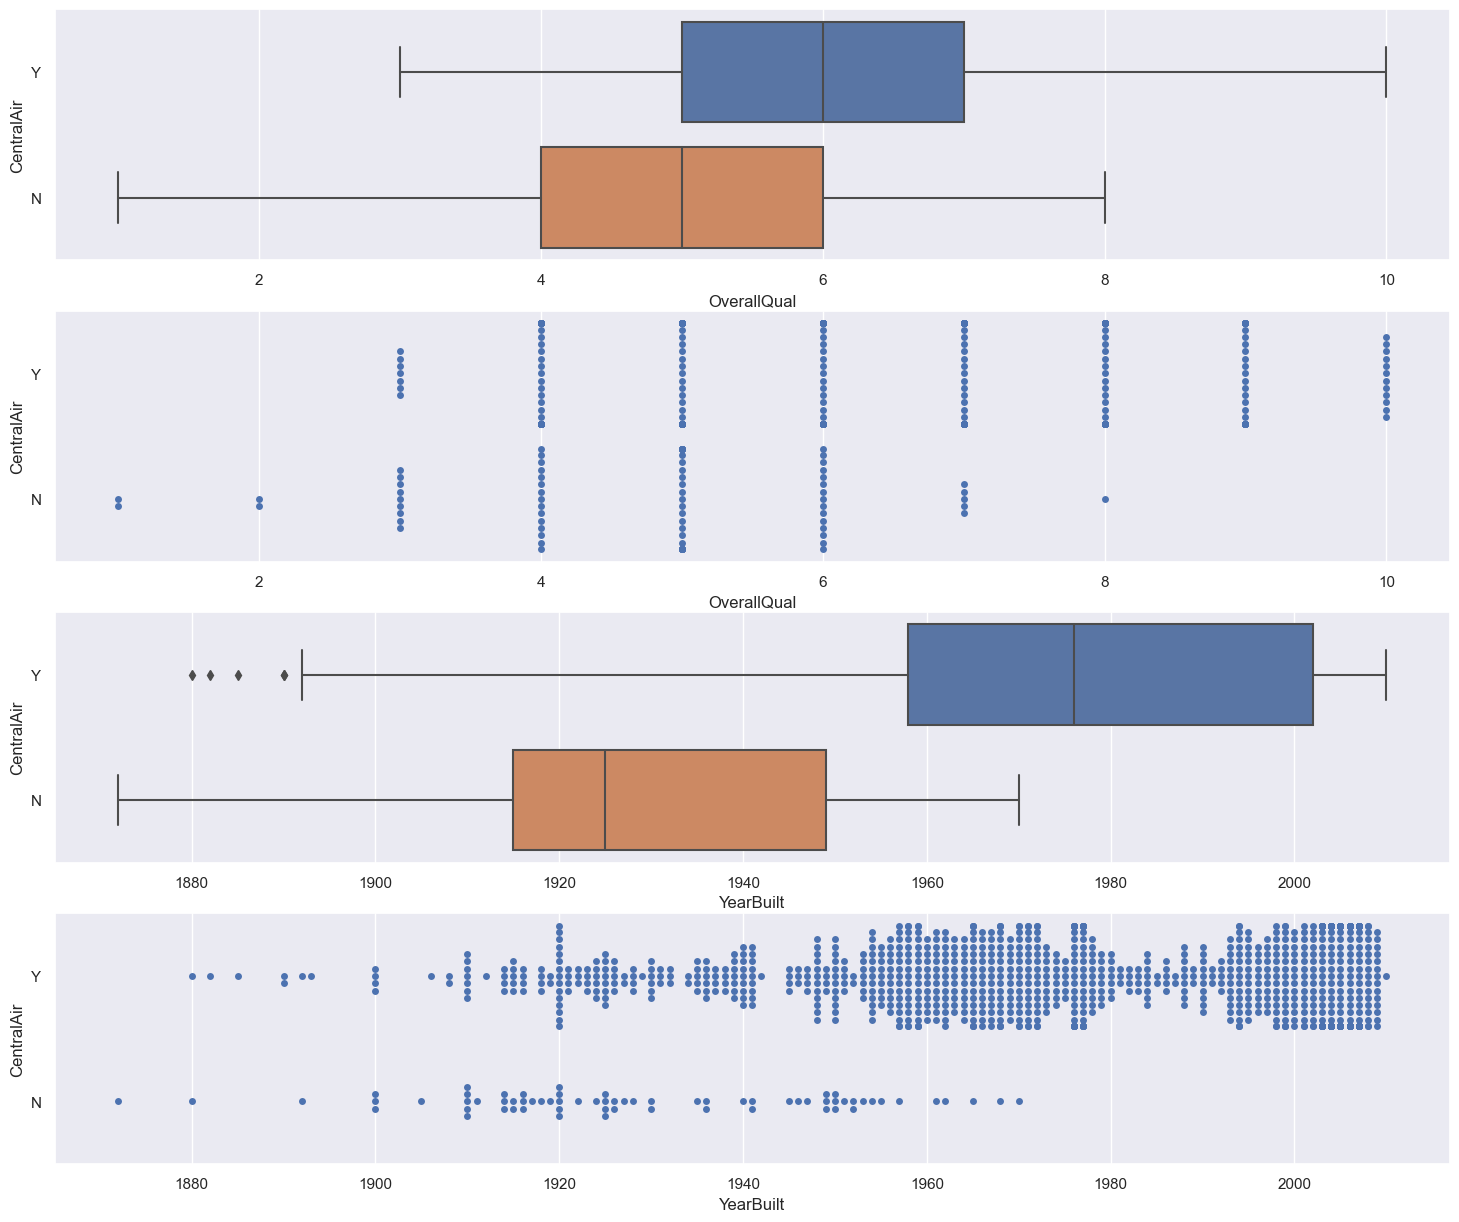

In [135]:
#joint the two data
df2 = pd.concat([oq_train, ca1_train], axis = 1).reindex(oq_train.index)
df3 = pd.concat([yb_train, ca2_train], axis = 1).reindex(yb_train.index)

#plot both the response to predictor in a boxplot and swarmplot to visualise the partition
f, axes = plt.subplots(4, 1, figsize=(18, 15))
sb.boxplot(x = 'OverallQual', y = 'CentralAir', data = df2, orient = "h", ax = axes[0])
sb.swarmplot(x = "OverallQual", y = "CentralAir", data = df2, orient = "h", ax = axes[1])
sb.boxplot(x = 'YearBuilt', y = 'CentralAir', data = df3, orient = "h", ax = axes[2])
sb.swarmplot(x = "YearBuilt", y = "CentralAir", data = df3, orient = "h", ax = axes[3])

From the swarmplot and boxplot,    
the final partition for OverallQual should fall around 7, whereby the probability of there having "CentralAir" for OverallQual > 7 is almost certain.    
the final partition for YearBuilt should fall around 1970, whereby the probability of there having "CentralAir" for YearBuilt > 1970 is almost certain.

In [136]:
# decision tree classifier object
dectree1 = DecisionTreeClassifier(max_depth = 3)
dectree2 = DecisionTreeClassifier(max_depth = 3)

In [137]:
#feeding it training data
dectree1.fit(oq_train, ca1_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
dectree2.fit(yb_train, ca2_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.4090909090909091, 0.875, 'OverallQual <= 3.5\ngini = 0.129\nsamples = 1095\nvalue = [76, 1019]\nclass = CA'),
 Text(0.18181818181818182, 0.625, 'OverallQual <= 2.5\ngini = 0.455\nsamples = 20\nvalue = [13, 7]\nclass = no CA'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no CA'),
 Text(0.2727272727272727, 0.375, 'gini = 0.492\nsamples = 16\nvalue = [9, 7]\nclass = no CA'),
 Text(0.6363636363636364, 0.625, 'OverallQual <= 5.5\ngini = 0.11\nsamples = 1075\nvalue = [63, 1012]\nclass = CA'),
 Text(0.45454545454545453, 0.375, 'OverallQual <= 4.5\ngini = 0.197\nsamples = 379\nvalue = [42, 337]\nclass = CA'),
 Text(0.36363636363636365, 0.125, 'gini = 0.317\nsamples = 76\nvalue = [15, 61]\nclass = CA'),
 Text(0.5454545454545454, 0.125, 'gini = 0.162\nsamples = 303\nvalue = [27, 276]\nclass = CA'),
 Text(0.8181818181818182, 0.375, 'OverallQual <= 6.5\ngini = 0.059\nsamples = 696\nvalue = [21, 675]\nclass = CA'),
 Text(0.7272727272727273, 0.125, 'gi

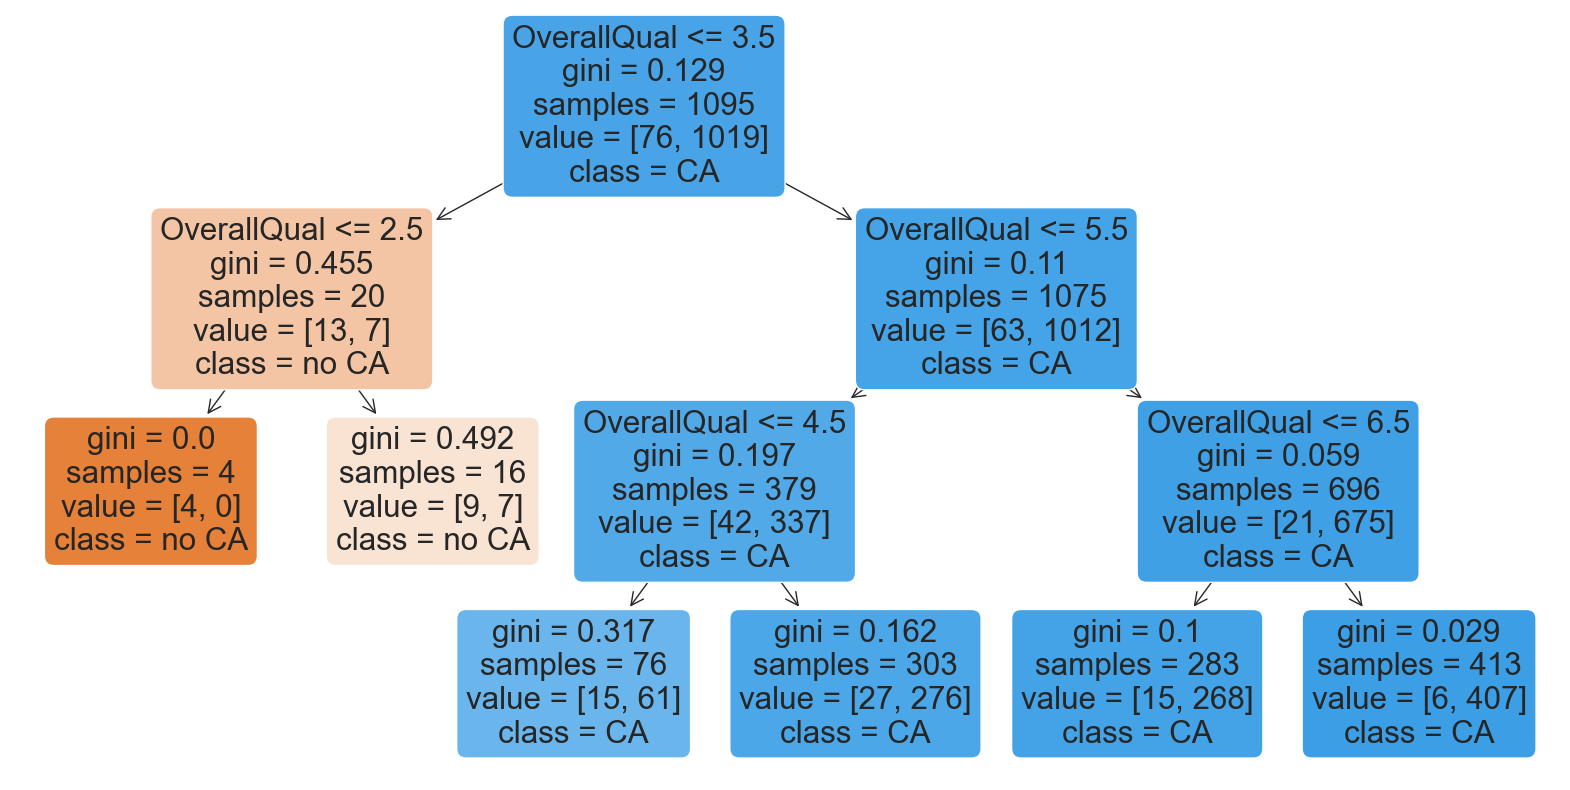

In [139]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,10))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["no CA","CA"])

[Text(0.5769230769230769, 0.875, 'YearBuilt <= 1953.5\ngini = 0.116\nsamples = 1095\nvalue = [68, 1027]\nclass = CA'),
 Text(0.3076923076923077, 0.625, 'YearBuilt <= 1917.5\ngini = 0.35\nsamples = 265\nvalue = [60, 205]\nclass = CA'),
 Text(0.15384615384615385, 0.375, 'YearBuilt <= 1876.0\ngini = 0.474\nsamples = 57\nvalue = [22, 35]\nclass = CA'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no CA'),
 Text(0.23076923076923078, 0.125, 'gini = 0.469\nsamples = 56\nvalue = [21, 35]\nclass = CA'),
 Text(0.46153846153846156, 0.375, 'YearBuilt <= 1930.5\ngini = 0.299\nsamples = 208\nvalue = [38, 170]\nclass = CA'),
 Text(0.38461538461538464, 0.125, 'gini = 0.353\nsamples = 83\nvalue = [19, 64]\nclass = CA'),
 Text(0.5384615384615384, 0.125, 'gini = 0.258\nsamples = 125\nvalue = [19, 106]\nclass = CA'),
 Text(0.8461538461538461, 0.625, 'YearBuilt <= 1970.5\ngini = 0.019\nsamples = 830\nvalue = [8, 822]\nclass = CA'),
 Text(0.7692307692307693, 0.375, 'Ye

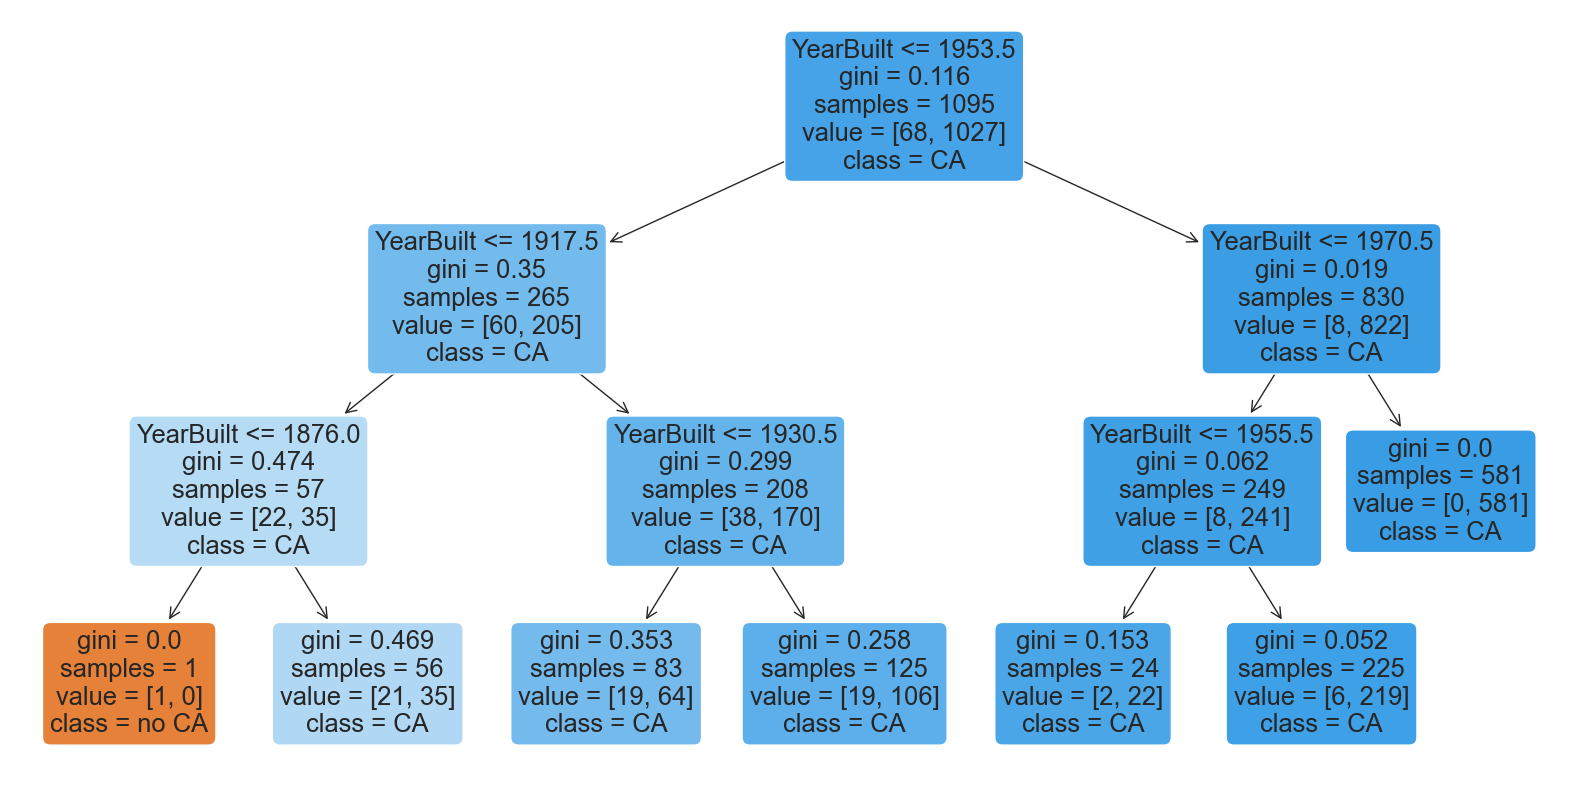

In [140]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,10))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["no CA","CA"])

For OverallQual vs CentralAir with binary tree of depth level = 3,


Classification Accuracy of TRAIN SET				: 0.9360730593607306
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.9931305201177625
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.8289473684210527


Classification Accuracy of TEST SET				: 0.9506849315068493
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9942196531791907
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.8421052631578947


Confusion Matrix of TRAIN SET:		 Confusion Matrix of TEST SET:		


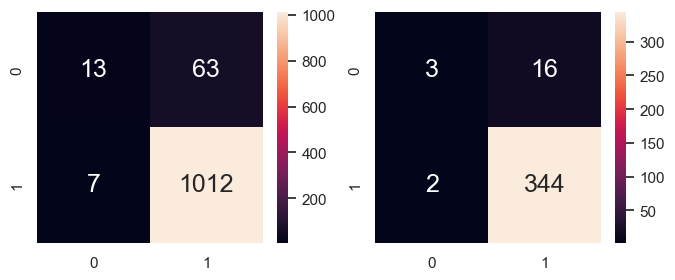

In [141]:
#predict CA corresponding to oq_train, oq_test
ca_train_pred1 = dectree1.predict(oq_train)
ca_test_pred1 = dectree1.predict(oq_test)

#plot the two-way Confusion Matrix
f,ax = plt.subplots(1,2,figsize=(8,3))
cnf_trainmatrix_1 = confusion_matrix(ca1_train, ca_train_pred1)
cnf_testmatrix_1 = confusion_matrix(ca1_test, ca_test_pred1)
sb.heatmap(cnf_trainmatrix_1, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(cnf_testmatrix_1, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[1])

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 3
FPtrain1 = cnf_trainmatrix_1.sum(axis=0) - np.diag(cnf_trainmatrix_1)  
FNtrain1 = cnf_trainmatrix_1.sum(axis=1) - np.diag(cnf_trainmatrix_1)
TPtrain1 = np.diag(cnf_trainmatrix_1)
TNtrain1 = cnf_trainmatrix_1.sum() - (FPtrain1 + FNtrain1 + TPtrain1)

FPtrain1 = FPtrain1.astype(float)
FNtrain1 = FNtrain1.astype(float)
TPtrain1 = TPtrain1.astype(float)
TNtrain1 = TNtrain1.astype(float)

#TPR
TPRtrain1 = TPtrain1/(TPtrain1+FNtrain1)
#FPR
FPRtrain1 = FPtrain1/(FPtrain1+TNtrain1)

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 4
FPtest1 = cnf_testmatrix_1.sum(axis=0) - np.diag(cnf_testmatrix_1)  
FNtest1 = cnf_testmatrix_1.sum(axis=1) - np.diag(cnf_testmatrix_1)
TPtest1 = np.diag(cnf_testmatrix_1)
TNtest1 = cnf_testmatrix_1.sum() - (FPtest1 + FNtest1 + TPtest1)

FPtest1 = FPtest1.astype(float)
FNtest1 = FNtest1.astype(float)
TPtest1 = TPtest1.astype(float)
TNtest1 = TNtest1.astype(float)

#TPR
TPRtest1 = TPtest1/(TPtest1+FNtest1)
#FPR
FPRtest1 = FPtest1/(FPtest1+TNtest1)

#print the Classification Accuracy
print("For OverallQual vs CentralAir with binary tree of depth level = 3,")
print("\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree1.score(oq_train, ca1_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:", (TPRtrain1[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:",(FPRtrain1[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree1.score(oq_test, ca1_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:", (TPRtest1[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:",(FPRtest1[1]))
print("\n")
print("Confusion Matrix of TRAIN SET:\t\t Confusion Matrix of TEST SET:\t\t")

For YearBuilt vs CentralAir with binary tree of depth level = 3,


Classification Accuracy of TRAIN SET				: 0.9388127853881278
The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 1.0
The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is	: 0.9852941176470589


Classification Accuracy of TEST SET				: 0.9287671232876712
The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 1.0
The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is	: 0.9629629629629629


Confusion Matrix of TRAIN SET:		 Confusion Matrix of TEST SET:		


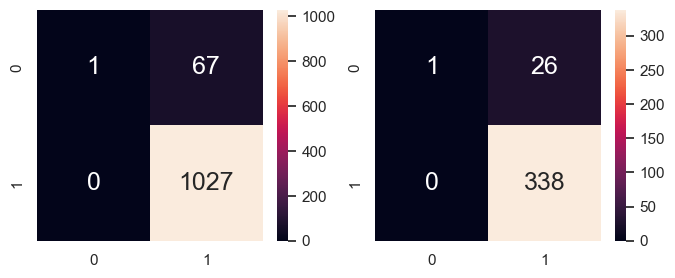

In [142]:
#predict CA corresponding to yb_train, yb_test
ca_train_pred2 = dectree2.predict(yb_train)
ca_test_pred2 = dectree2.predict(yb_test)

#plot the two-way Confusion Matrix
f,ax = plt.subplots(1,2,figsize=(8,3))
cnf_trainmatrix_2 = confusion_matrix(ca2_train, ca_train_pred2)
cnf_testmatrix_2 = confusion_matrix(ca2_test, ca_test_pred2)
sb.heatmap(cnf_trainmatrix_2, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[0])
sb.heatmap(cnf_testmatrix_2, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = ax[1])

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 3
FPtrain2 = cnf_trainmatrix_2.sum(axis=0) - np.diag(cnf_trainmatrix_2)  
FNtrain2 = cnf_trainmatrix_2.sum(axis=1) - np.diag(cnf_trainmatrix_2)
TPtrain2 = np.diag(cnf_trainmatrix_2)
TNtrain2 = cnf_trainmatrix_2.sum() - (FPtrain2 + FNtrain2 + TPtrain2)

FPtrain2 = FPtrain2.astype(float)
FNtrain2 = FNtrain2.astype(float)
TPtrain2 = TPtrain2.astype(float)
TNtrain2 = TNtrain2.astype(float)

#TPR
TPRtrain2 = TPtrain2/(TPtrain2+FNtrain2)
#FPR
FPRtrain2 = FPtrain2/(FPtrain2+TNtrain2)

##CALCULATION FOR TPR AND FPR TRAIN MATRIX DEPTH 4
FPtest2 = cnf_testmatrix_2.sum(axis=0) - np.diag(cnf_testmatrix_2)  
FNtest2 = cnf_testmatrix_2.sum(axis=1) - np.diag(cnf_testmatrix_2)
TPtest2 = np.diag(cnf_testmatrix_2)
TNtest2 = cnf_testmatrix_2.sum() - (FPtest2 + FNtest2 + TPtest2)

FPtest2 = FPtest2.astype(float)
FNtest2 = FNtest2.astype(float)
TPtest2 = TPtest2.astype(float)
TNtest2 = TNtest2.astype(float)

#TPR
TPRtest2 = TPtest2/(TPtest2+FNtest2)
#FPR
FPRtest2 = FPtest2/(FPtest2+TNtest2)

#print the Classification Accuracy
print("For YearBuilt vs CentralAir with binary tree of depth level = 3,")
print("\n")
print("Classification Accuracy of TRAIN SET\t\t\t\t:", dectree2.score(yb_train, ca2_train))
print("The TRUE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:", (TPRtrain2[1]))
print("The FALSE Positive Rate for TRAIN MATRIX of DEPTH LEVEL 3 is\t:",(FPRtrain2[1]))
print("\n")
print("Classification Accuracy of TEST SET\t\t\t\t:", dectree2.score(yb_test, ca2_test))
print("The TRUE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:", (TPRtest2[1]))
print("The FALSE Positive Rate for TEST MATRIX of DEPTH LEVEL 3 is\t:",(FPRtest2[1]))
print("\n")
print("Confusion Matrix of TRAIN SET:\t\t Confusion Matrix of TEST SET:\t\t")

To determine which is the better model to predict CentralAir (CA), we need to take a look at the classification accuracy, TPR and FPR of the model.   
For the train set, the Classification Accuracy for OverallQual (oq) and YearBuilt (yb) is 0.936 and 0.938 respectively.     
For the test set, the Classification Accuracy for OverallQual (oq) and YearBuilt (yb) is 0.950 and 0.928 respectively. 

For training set, the CA of OQ (0.936) is < the CA of yb (0.938).   
For test set however, the CA of OQ (0.950) is > the CA of yb (0.928).

Despite the CA of test of OQ is less than the CA of YB (0.936 < 0.938), the prediction model generated from the training set of OQ however provides a more accurate prediction of CentralAir when tested on the test set, evident by the CA of OQ being much greater than that of YB (0.950 > 0.928).
Thus, OQ ability to provide a more accurate prediction thus makes it a accurate and hence better model to predict CA than YearBuilt.

### Problem 3 : Understanding the Misclassified Samples

(a) Print the Classification Tree of max depth 3 that you fit in Problem 1(a). Note that each leaf node of your tree
represents a specific partition of your training data, based on certain conditions given by the splits in the tree.
Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and
print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

[Text(0.5, 0.875, 'SalePrice <= 98300.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = CA'),
 Text(0.25, 0.625, 'SalePrice <= 62750.0\ngini = 0.499\nsamples = 85\nvalue = [41, 44]\nclass = CA'),
 Text(0.125, 0.375, 'SalePrice <= 59250.0\ngini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = no CA'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = no CA'),
 Text(0.1875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = no CA'),
 Text(0.375, 0.375, 'SalePrice <= 97500.0\ngini = 0.481\nsamples = 72\nvalue = [29, 43]\nclass = CA'),
 Text(0.3125, 0.125, 'gini = 0.47\nsamples = 69\nvalue = [26, 43]\nclass = CA'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no CA'),
 Text(0.75, 0.625, 'SalePrice <= 145125.0\ngini = 0.071\nsamples = 1010\nvalue = [37, 973]\nclass = CA'),
 Text(0.625, 0.375, 'SalePrice <= 107750.0\ngini = 0.167\nsamples = 336\nvalue = [31, 305]\nclass = CA'),
 Text(0.5625, 0.125, 'gini = 0.353\nsamples = 35\n

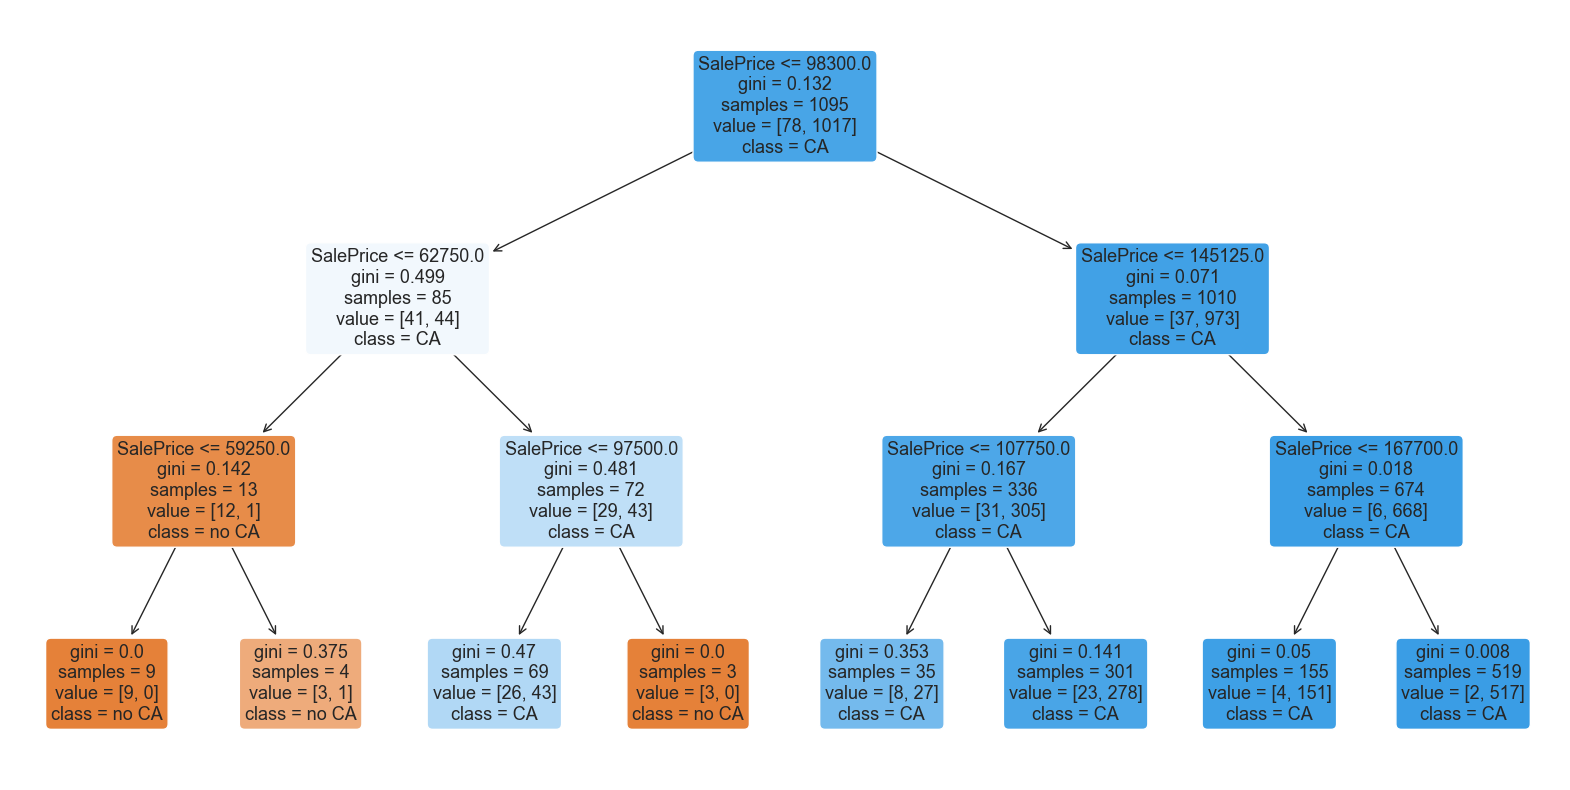

In [92]:
#Classification Tree for 1(a) MaxDepth - 3
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(20,10))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["no CA","CA"])

FP -- is the predicted True for CA but wrong (predict = 1, actual = 0)    
In the confusion matrix, the number of FP = 47   

The gini coefficient is the confidence in prediction of its respective class.   
The higher the gini coefficient, the higher the number of false prediction.   
Hence to find the highest number of FP among the leaf nodes, we need to look out for the leaf nodes that has class = 'CA' and the value of the gini coefficient is the highest.   
From the binary tree, the left leaf node with gini coefficient of 0.47 is hence the leaf node with the highest number of false positives.  

In [145]:
FProws = df[(df['SalePrice'] > 62750.0) & (df['SalePrice'] <= 97500.0)]
FProws_sort = FProws.sort_values(by = 'SalePrice', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [146]:
#set to print all 68 rows
pd.set_option('display.max_rows', 70)
print(f"Below is the {FProws_sort.shape[0]} datarows in leaf node of gini 0.47 and class = 'CA', sorted by SalePrice\n")
print(FProws_sort)

Below is the 69 datarows in leaf node of gini 0.47 and class = 'CA', sorted by SalePrice

      SalePrice CentralAir
1432      64500          Y
398       67000          Y
1279      68400          Y
29        68500          N
264       73000          N
915       75000          Y
614       75500          Y
250       76500          Y
155       79000          N
1326      79000          Y
589       79500          Y
431       79900          Y
935       79900          Y
1039      80000          Y
1143      80000          Y
1144      80000          N
1218      80500          N
434       81000          Y
386       81000          Y
1061      81000          Y
1000      82000          N
39        82000          N
632       82500          Y
1323      82500          Y
308       82500          Y
1378      83000          Y
98        83000          N
1086      83500          Y
1035      84000          N
1453      84500          Y
125       84500          N
649       84500          Y
1049      84900    

(b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

In [95]:
FPonlyrows = df[(df['SalePrice'] > 62750.0) & (df['SalePrice'] <= 97500.0) & (df['CentralAir'] == 'N')]
FPonlyrows_sort = FPonlyrows.sort_values(by = 'SalePrice', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [147]:
print(f"Below is the {FPonlyrows_sort.shape[0]} FALSE POSITIVE datarows in leaf node of gini 0.47 and class = 'CA', sorted by SalePrice\n")
print(FPonlyrows_sort)

Below is the 26 FALSE POSITIVE datarows in leaf node of gini 0.47 and class = 'CA', sorted by SalePrice

      SalePrice CentralAir
29        68500          N
264       73000          N
155       79000          N
1144      80000          N
1218      80500          N
39        82000          N
1000      82000          N
98        83000          N
1035      84000          N
125       84500          N
1013      85000          N
88        85000          N
325       87000          N
676       87000          N
342       87500          N
912       88000          N
1412      90000          N
1062      90000          N
438       90350          N
1376      91000          N
998       91000          N
821       93000          N
736       93500          N
1137      94000          N
352       95000          N
514       96500          N
